<a href="https://colab.research.google.com/github/Nayak19navya/NavyaNAYAK-CLAUSE_AI/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1️⃣ Mount Google Drive (force remount to avoid mount errors)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 2️⃣ Import libraries
import os
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 3️⃣ Define folder containing contract txt files
raw_txt_folder = "/content/drive/MyDrive/CLAUSE_AI/data/raw/CUAD_v1/full_contract_txt"

# 4️⃣ Read all contracts into a DataFrame
contracts_data = []
for file in os.listdir(raw_txt_folder):
    if file.endswith(".txt"):
        path = os.path.join(raw_txt_folder, file)
        with open(path, "r", encoding="utf-8", errors="ignore") as f:
            text = f.read()
        contracts_data.append({
            'file_name': file,
            'text': text,
            'num_words': len(text.split()),
            'num_chars': len(text)
        })

contracts_df = pd.DataFrame(contracts_data)
print("✅ Contracts loaded. Sample:")
print(contracts_df.head())

# 5️⃣ Define cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', ' ', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    return ' '.join(words)

# 6️⃣ Apply cleaning
contracts_df['clean_text'] = contracts_df['text'].apply(clean_text)
print("✅ Cleaned text added. Sample:")
print(contracts_df[['file_name','clean_text']].head())


Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✅ Contracts loaded. Sample:
                                           file_name  \
0  2ThemartComInc_19990826_10-12G_EX-10.10_670028...   
1  ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...   
2  ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...   
3  ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...   
4  ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...   

                                                text  num_words  num_chars  
0  CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...       4467      29454  
1  EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...       4115      26346  
2  EXHIBIT 10.13\n\n                             ...       1911      13038  
3  Exhibit 10.31    PURSUANT TO 17 C.F.R. § 240.2...      13349      89484  
4  REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...       3770      24632  
✅ Cleaned text added. Sample:
                                           file_name  \
0  2ThemartComInc_19990826_10-12G_EX-10.10_670028...   
1  ABILITYINC_06_15_2020-EX-4.2

In [ ]:
import os
import json
import pandas as pd

# Base paths
BASE = "/content/drive/MyDrive/CLAUSE_AI"
RAW_FOLDER = os.path.join(BASE, "data", "raw", "CUAD_v1")

# Paths to dataset files
json_path = os.path.join(RAW_FOLDER, "CUAD_v1.json")
csv_path  = os.path.join(RAW_FOLDER, "master_clauses.csv")


In [ ]:
# Load CUAD JSON
with open(json_path, "r") as f:
    cuad_data = json.load(f)

print("✅ CUAD JSON loaded")
print("Type of cuad_data:", type(cuad_data))           # Should be dict
print("Top-level keys:", cuad_data.keys())            # ['version', 'data']


✅ CUAD JSON loaded
Type of cuad_data: <class 'dict'>
Top-level keys: dict_keys(['version', 'data'])


In [ ]:
#Extracting contract list
contracts = cuad_data['data']
print("Number of contracts:", len(contracts))
print("First contract keys:", contracts[0].keys())    # ['title', 'paragraphs']


Number of contracts: 510
First contract keys: dict_keys(['title', 'paragraphs'])


In [ ]:
clauses_list = []

for contract in contracts:
    title = contract['title']
    for i, para in enumerate(contract['paragraphs']):
        qas_list = para.get('qas', [])
        for qas in qas_list:
            answers = qas.get('answers', [])
            for ans in answers:
                row = {
                    'contract_title': title,
                    'paragraph_index': i,
                    'qas_id': qas.get('id', None),
                    'answer_text': ans.get('text', None),
                    'answer_start': ans.get('answer_start', None)
                }
                clauses_list.append(row)

# Create DataFrame
clauses_df = pd.DataFrame(clauses_list)
print("✅ Flattened JSON into DataFrame")
print("Shape:", clauses_df.shape)
print(clauses_df.head())


✅ Flattened JSON into DataFrame
Shape: (13823, 5)
                                      contract_title  paragraph_index  \
0  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...                0   
1  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...                0   
2  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...                0   
3  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...                0   
4  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...                0   

                                              qas_id  \
0  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...   
1  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...   
2  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...   
3  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...   
4  LIMEENERGYCO_09_09_1999-EX-10-DISTRIBUTOR AGRE...   

                        answer_text  answer_start  
0             DISTRIBUTOR AGREEMENT            44  
1                       Distributor           244  
2               El

In [ ]:
master_clauses = pd.read_csv(csv_path)
print("✅ master_clauses CSV loaded")
print(master_clauses.head())


✅ master_clauses CSV loaded
                                            Filename  \
0  CybergyHoldingsInc_20140520_10-Q_EX-10.27_8605...   
1  EuromediaHoldingsCorp_20070215_10SB12G_EX-10.B...   
2  FulucaiProductionsLtd_20131223_10-Q_EX-10.9_83...   
3  GopageCorp_20140221_10-K_EX-10.1_8432966_EX-10...   
4  IdeanomicsInc_20160330_10-K_EX-10.26_9512211_E...   

                                    Document Name  \
0               ['MARKETING AFFILIATE AGREEMENT']   
1   ['VIDEO-ON-DEMAND CONTENT LICENSE AGREEMENT']   
2  ['CONTENT DISTRIBUTION AND LICENSE AGREEMENT']   
3           ['WEBSITE CONTENT LICENSE AGREEMENT']   
4                   ['CONTENT LICENSE AGREEMENT']   

                         Document Name-Answer  \
0               MARKETING AFFILIATE AGREEMENT   
1   VIDEO-ON-DEMAND CONTENT LICENSE AGREEMENT   
2  CONTENT DISTRIBUTION AND LICENSE AGREEMENT   
3           WEBSITE CONTENT LICENSE AGREEMENT   
4                   CONTENT LICENSE AGREEMENT   

                     

In [ ]:
# Count of missing answers per column
missing_per_category = clauses_df.isna().sum()
print("Missing values per column:\n", missing_per_category)


Missing values per column:
 contract_title     0
paragraph_index    0
qas_id             0
answer_text        0
answer_start       0
dtype: int64


In [ ]:
# Show all columns in the flattened DataFrame
print("Columns in clauses_df:")
print(clauses_df.columns.tolist())


Columns in clauses_df:
['contract_title', 'paragraph_index', 'qas_id', 'answer_text', 'answer_start']


In [ ]:
# Define required packages
requirements = """
openai>=1.0.0
langchain>=0.0.300
pinecone-client>=2.2.1
PyPDF2>=3.0.0
python-docx>=0.8.11
streamlit>=1.24.0
fpdf2>=2.6.0
pandas>=1.5.0
tqdm>=4.64.0
requests>=2.28.0
"""

# Write requirements.txt inside CLAUSE_AI
with open("/content/drive/MyDrive/CLAUSE_AI/requirements.txt", "w") as f:
    f.write(requirements.strip())

print("✅ requirements.txt created at /content/drive/MyDrive/CLAUSE_AI/")


✅ requirements.txt created at /content/drive/MyDrive/CLAUSE_AI/


In [ ]:
!pip install -r /content/drive/MyDrive/CLAUSE_AI/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.6/301.6 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.8 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd

# Path to your full contract text folder
contracts_folder = "/content/drive/MyDrive/CLAUSE_AI/data/raw/CUAD_v1/full_contract_txt"

# Get all contract files
contract_files = [f for f in os.listdir(contracts_folder) if f.endswith(".txt")]

# Collect contract sizes
contract_data = []
for file in contract_files:
    path = os.path.join(contracts_folder, file)
    with open(path, "r", encoding="utf-8") as f:
        text = f.read()
        words = text.split()
        contract_data.append({
            "file_name": file,
            "num_words": len(words),
            "num_chars": len(text)
        })

contracts_df = pd.DataFrame(contract_data)
contracts_df.head()


,file_name,num_words,num_chars
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,4467,29454
1,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,4115,26346
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,1911,13038
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,13349,89484
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,3770,24632


In [ ]:
# Quick look at the first few contracts
contracts_df.head()


,file_name,num_words,num_chars
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,4467,29454
1,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,4115,26346
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,1911,13038
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,13349,89484
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,3770,24632


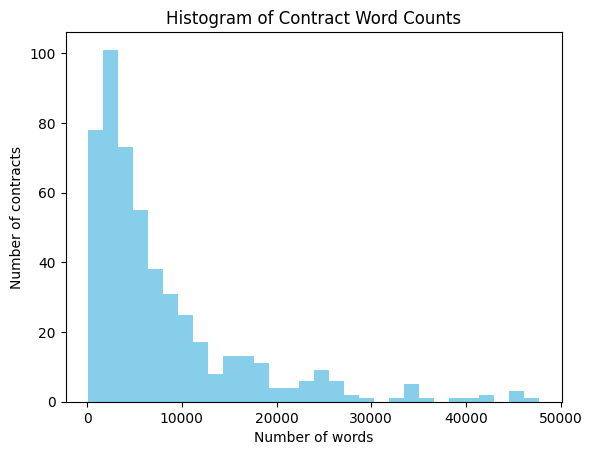

In [ ]:
# Optional: visualize word count distribution
import matplotlib.pyplot as plt

plt.hist(contracts_df['num_words'], bins=30, color='skyblue')
plt.title("Histogram of Contract Word Counts")
plt.xlabel("Number of words")
plt.ylabel("Number of contracts")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check what's inside the raw folder
!ls "/content/drive/MyDrive/CLAUSE_AI/data/raw"


CUAD_v1  CUAD_v1.zip


In [ ]:
import zipfile
import os

# Paths
zip_path = "/content/drive/MyDrive/CLAUSE_AI/data/raw/CUAD_v1.zip"
extract_to = "/content/drive/MyDrive/CLAUSE_AI/data/raw/CUAD_v1"

# Unzip if not already done
if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("✅ CUAD_v1.zip extracted successfully")
else:
    print("✅ CUAD_v1 folder already exists")


✅ CUAD_v1 folder already exists


In [ ]:
import pandas as pd
import os

# Path to the text files
txt_folder = "/content/drive/MyDrive/CLAUSE_AI/data/raw/CUAD_v1/full_contract_txt"

# List all text files
files = [f for f in os.listdir(txt_folder) if f.endswith('.txt')]

contracts_list = []

for file in files:
    file_path = os.path.join(txt_folder, file)
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    contracts_list.append({
        'file_name': file,
        'text': text,
        'num_words': len(text.split()),
        'num_chars': len(text)
    })

# Create DataFrame
contracts_df = pd.DataFrame(contracts_list)

# Show the first 5 rows
contracts_df.head()


,file_name,text,num_words,num_chars
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...,4467,29454
1,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...,4115,26346
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,EXHIBIT 10.13\n\n ...,1911,13038
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,Exhibit 10.31 PURSUANT TO 17 C.F.R. § 240.2...,13349,89484
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...,3770,24632


In [ ]:
import os

# Correct path to the full contract txt files
raw_txt_folder = "/content/drive/MyDrive/CLAUSE_AI/data/raw/CUAD_v1/full_contract_txt"

# List all files
all_files = os.listdir(raw_txt_folder)

empty_files = []

for f in all_files:
    file_path = os.path.join(raw_txt_folder, f)
    if os.path.isfile(file_path):
        if os.path.getsize(file_path) == 0:  # file size 0 bytes
            empty_files.append(f)

print(f"✅ Total text files: {len(all_files)}")
print(f"⚠️ Empty files found: {len(empty_files)}")
if empty_files:
    print("List of empty files:", empty_files)
else:
    print("No empty files found! All good. ✅")


✅ Total text files: 510
⚠️ Empty files found: 0
No empty files found! All good. ✅


In [ ]:
import pandas as pd

contracts_data = []

for f in all_files:
    file_path = os.path.join(raw_txt_folder, f)
    with open(file_path, "r", encoding="utf-8", errors="ignore") as file:
        text = file.read()
        contracts_data.append({
            "file_name": f,
            "num_words": len(text.split()),
            "num_chars": len(text)
        })

contracts_df = pd.DataFrame(contracts_data)
print("✅ Contracts word/char counts calculated")
print(contracts_df.head())


✅ Contracts word/char counts calculated
                                           file_name  num_words  num_chars
0  2ThemartComInc_19990826_10-12G_EX-10.10_670028...       4467      29454
1  ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...       4115      26346
2  ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...       1911      13038
3  ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...      13349      89484
4  ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...       3770      24632


In [ ]:
import os
import pandas as pd

# Correct path to contract txt files
raw_txt_folder = "/content/drive/MyDrive/CLAUSE_AI/data/raw/CUAD_v1/full_contract_txt"

# Create a DataFrame
contracts_list = []

for file in os.listdir(raw_txt_folder):
    if file.endswith(".txt"):
        with open(os.path.join(raw_txt_folder, file), "r", encoding="utf-8", errors="ignore") as f:
            text = f.read()
        contracts_list.append({
            "file_name": file,
            "text": text,
            "num_words": len(text.split()),
            "num_chars": len(text)
        })

contracts_df = pd.DataFrame(contracts_list)
print("✅ Contracts DataFrame created")
print(contracts_df.head())


✅ Contracts DataFrame created
                                           file_name  \
0  2ThemartComInc_19990826_10-12G_EX-10.10_670028...   
1  ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...   
2  ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...   
3  ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...   
4  ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...   

                                                text  num_words  num_chars  
0  CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...       4467      29454  
1  EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...       4115      26346  
2  EXHIBIT 10.13\n\n                             ...       1911      13038  
3  Exhibit 10.31    PURSUANT TO 17 C.F.R. § 240.2...      13349      89484  
4  REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...       3770      24632  


Total contracts: 510
          num_words      num_chars
count    510.000000     510.000000
mean    7861.188235   52563.005882
std     8367.292546   55946.484865
min      109.000000     645.000000
25%     2457.000000   16416.250000
50%     5006.000000   33143.000000
75%    10196.250000   66394.750000
max    47733.000000  338211.000000


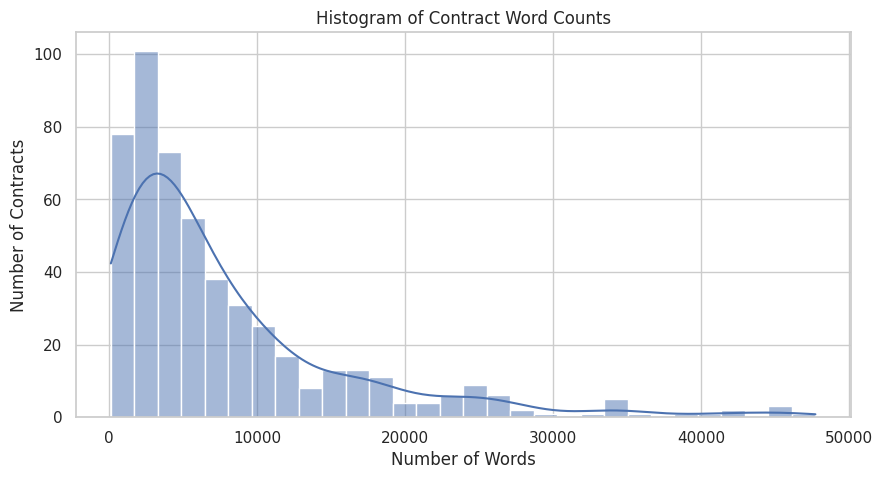

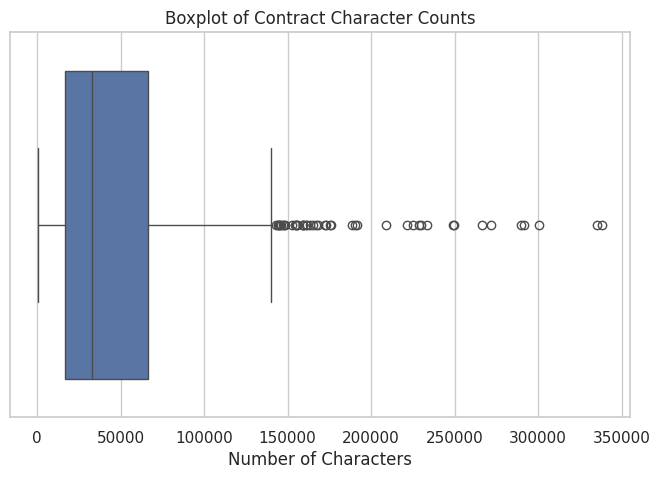

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Path to folder containing contract txt files
full_txt_folder = "/content/drive/MyDrive/CLAUSE_AI/data/raw/CUAD_v1/full_contract_txt"

# Read all text files and compute basic stats
contracts_data = []
for file in os.listdir(full_txt_folder):
    if file.endswith(".txt"):
        path = os.path.join(full_txt_folder, file)
        with open(path, "r", encoding="utf-8", errors="ignore") as f:
            text = f.read()
        contracts_data.append({
            'file_name': file,
            'text': text,
            'num_words': len(text.split()),
            'num_chars': len(text)
        })

contracts_df = pd.DataFrame(contracts_data)

# Summary
print("Total contracts:", len(contracts_df))
print(contracts_df[['num_words', 'num_chars']].describe())

# Visualize: Histogram of words
plt.figure(figsize=(10,5))
sns.histplot(contracts_df['num_words'], bins=30, kde=True)
plt.title("Histogram of Contract Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Number of Contracts")
plt.show()

# Visualize: Boxplot of characters
plt.figure(figsize=(8,5))
sns.boxplot(x=contracts_df['num_chars'])
plt.title("Boxplot of Contract Character Counts")
plt.xlabel("Number of Characters")
plt.show()


In [ ]:
# Top 5 largest contracts by word count
top5_words = contracts_df.sort_values('num_words', ascending=False).head()
print("Top 5 contracts by word count:")
print(top5_words[['file_name', 'num_words', 'num_chars']])


Top 5 contracts by word count:
                                             file_name  num_words  num_chars
170  GOOSEHEADINSURANCE,INC_04_02_2018-EX-10.6-Fran...      47733     300768
358  PhasebioPharmaceuticalsInc_20200330_10-K_EX-10...      45650     291873
83   CERES,INC_01_25_2012-EX-10.20-Collaboration Ag...      45577     335282
477  VerizonAbsLlc_20200123_8-K_EX-10.4_11952335_EX...      45143     289615
40   Array BioPharma Inc. - LICENSE, DEVELOPMENT AN...      42742     272018


Top 20 most frequent words:
the: 257278
of: 156455
and: 132873
to: 130141
or: 108944
in: 80359
any: 62243
a: 53541
shall: 48794
by: 44533
agreement: 43655
this: 39999
be: 39709
for: 38790
such: 36173
with: 33886
party: 33277
as: 32927
that: 27654
other: 26409


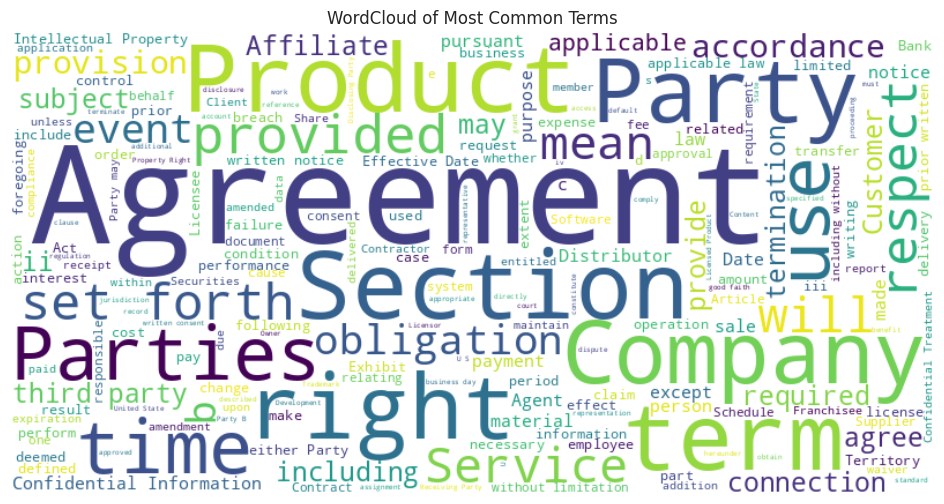

In [ ]:
from collections import Counter
import re
from wordcloud import WordCloud

# Combine all text
all_text = " ".join(contracts_df['text'].tolist())

# Tokenize words
words = re.findall(r'\b\w+\b', all_text.lower())

# Count top 20 most frequent words
word_counts = Counter(words)
top_20 = word_counts.most_common(20)
words_, counts_ = zip(*top_20)

# Print
print("Top 20 most frequent words:")
for w, c in top_20:
    print(f"{w}: {c}")

# WordCloud visualization
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Most Common Terms")
plt.show()


In [ ]:
# Count empty contracts
empty_files = contracts_df[contracts_df['num_words'] == 0]
print(f"⚠️ Empty contracts found: {len(empty_files)}")
if len(empty_files) > 0:
    print("Empty contract files:", empty_files['file_name'].tolist())
else:
    print("✅ No empty contracts found. All good.")


⚠️ Empty contracts found: 0
✅ No empty contracts found. All good.


VISUALISE:

Total contracts in JSON: 510
✅ Flattened JSON into DataFrame
✅ Loaded master_clauses CSV
✅ Full contracts loaded into DataFrame
Total contracts: 510
          num_words      num_chars
count    510.000000     510.000000
mean    7861.188235   52563.005882
std     8367.292546   55946.484865
min      109.000000     645.000000
25%     2457.000000   16416.250000
50%     5006.000000   33143.000000
75%    10196.250000   66394.750000
max    47733.000000  338211.000000
Empty contracts: 0


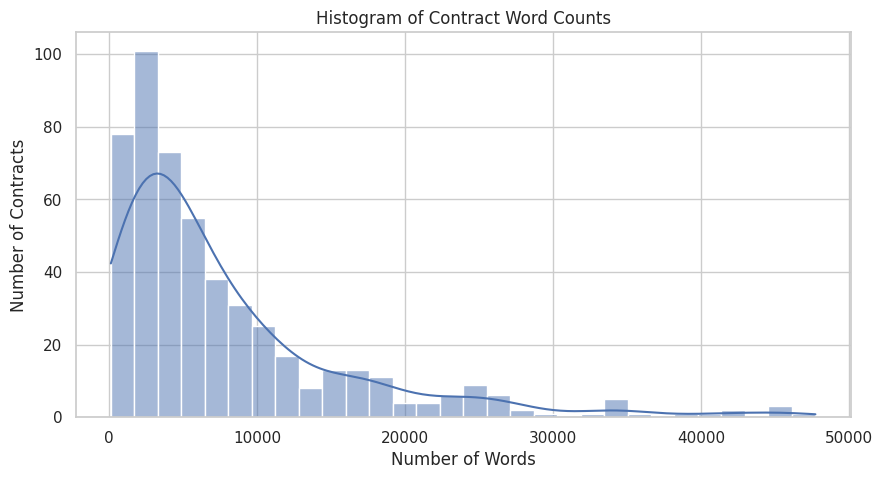

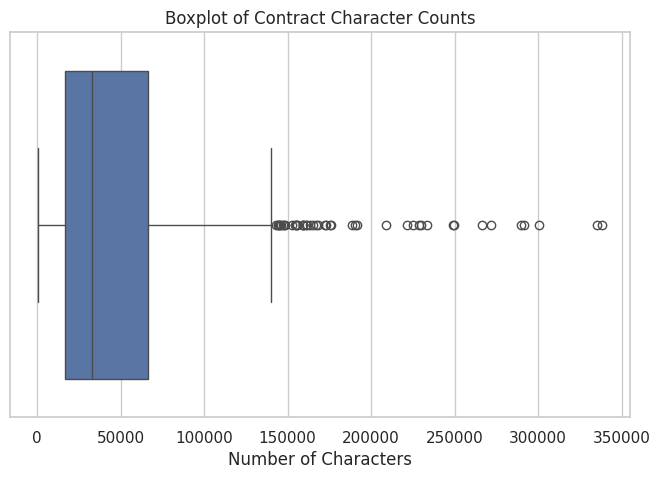

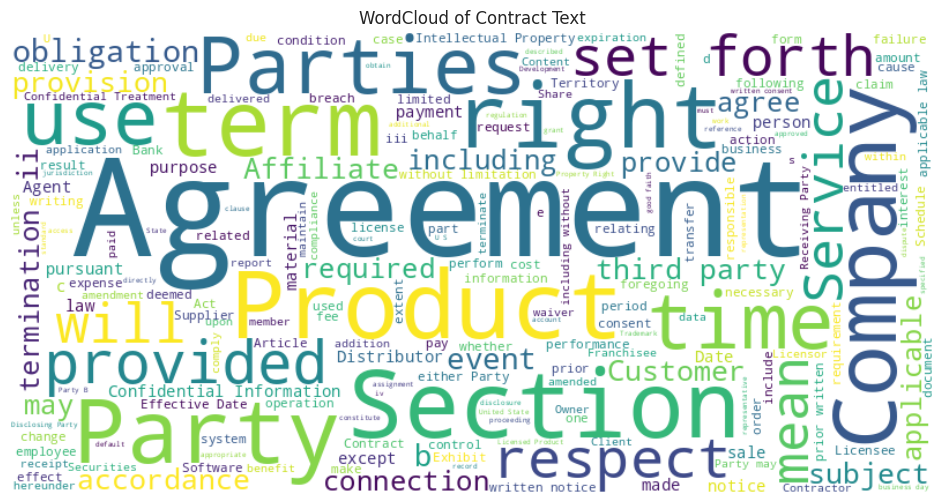

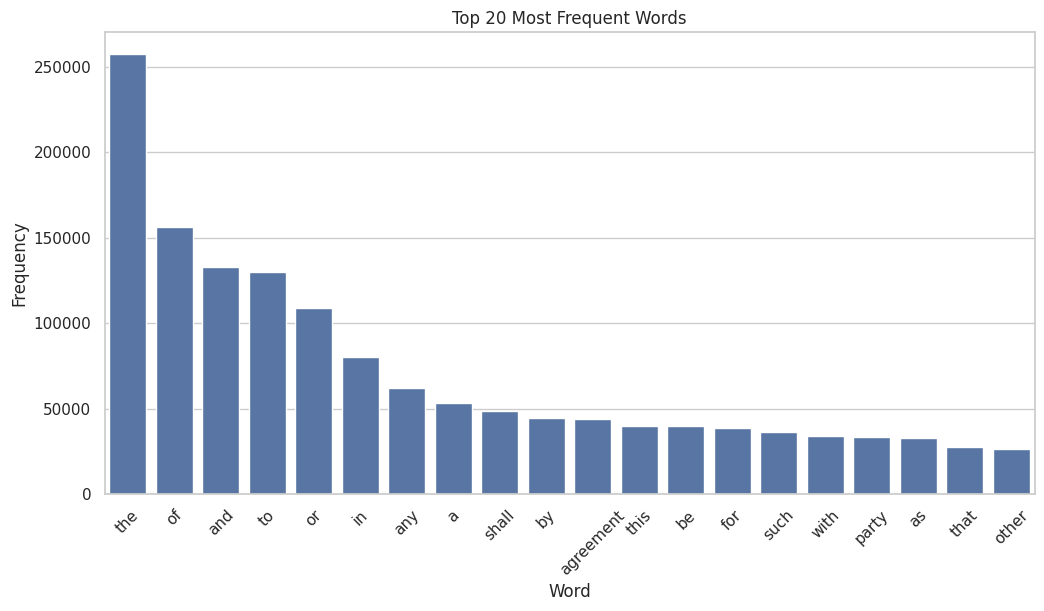

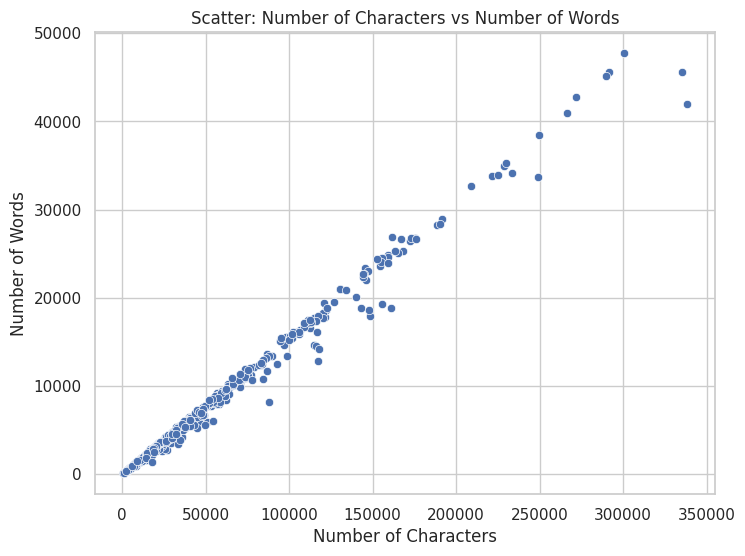

In [ ]:
# ✅ Step 0: Imports
import os
import json
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set seaborn style
sns.set(style="whitegrid")

# ✅ Step 1: Set paths
BASE = "/content/drive/MyDrive/CLAUSE_AI/data/raw/CUAD_v1"
cuad_json_path = os.path.join(BASE, "CUAD_v1.json")
master_csv_path = os.path.join(BASE, "master_clauses.csv")
full_txt_folder = os.path.join(BASE, "full_contract_txt")  # your contract txts

# ✅ Step 2: Load JSON
with open(cuad_json_path, "r") as f:
    cuad_data = json.load(f)

contracts = cuad_data['data']
print(f"Total contracts in JSON: {len(contracts)}")

# ✅ Step 3: Flatten JSON into DataFrame
clauses_list = []
for contract in contracts:
    title = contract['title']
    for i, para in enumerate(contract['paragraphs']):
        qas_list = para.get('qas', [])
        for qas in qas_list:
            answers = qas.get('answers', [])
            for ans in answers:
                row = {
                    'contract_title': title,
                    'paragraph_index': i,
                    'qas_id': qas.get('id', None),
                    'answer_text': ans.get('text', None),
                    'answer_start': ans.get('answer_start', None)
                }
                clauses_list.append(row)

clauses_df = pd.DataFrame(clauses_list)
print("✅ Flattened JSON into DataFrame")

# ✅ Step 4: Load master_clauses CSV
master_clauses = pd.read_csv(master_csv_path)
print("✅ Loaded master_clauses CSV")

# ✅ Step 5: Read full contract text files and compute basic stats
contracts_data = []
for file in os.listdir(full_txt_folder):
    if file.endswith(".txt"):
        path = os.path.join(full_txt_folder, file)
        with open(path, "r", encoding="utf-8", errors="ignore") as f:
            text = f.read()
        contracts_data.append({
            'file_name': file,
            'text': text,
            'num_words': len(text.split()),
            'num_chars': len(text)
        })

contracts_df = pd.DataFrame(contracts_data)
print("✅ Full contracts loaded into DataFrame")

# ✅ Step 6: Basic numerical EDA
print("Total contracts:", len(contracts_df))
print(contracts_df[['num_words', 'num_chars']].describe())
empty_files = contracts_df[contracts_df['num_words'] == 0]
print("Empty contracts:", len(empty_files))

# ✅ Step 7: Histogram of contract word counts
plt.figure(figsize=(10,5))
sns.histplot(contracts_df['num_words'], bins=30, kde=True)
plt.title("Histogram of Contract Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Number of Contracts")
plt.show()

# ✅ Step 8: Boxplot of contract character counts
plt.figure(figsize=(8,5))
sns.boxplot(x=contracts_df['num_chars'])
plt.title("Boxplot of Contract Character Counts")
plt.xlabel("Number of Characters")
plt.show()

# ✅ Step 9: WordCloud of most common words
all_text = " ".join(contracts_df['text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Contract Text")
plt.show()

# ✅ Step 10: Bar chart of top 20 words
words = re.findall(r'\b\w+\b', all_text.lower())
word_counts = Counter(words)
top_20 = word_counts.most_common(20)

words_, counts_ = zip(*top_20)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words_), y=list(counts_))
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.ylabel("Frequency")
plt.xlabel("Word")
plt.show()

# ✅ Step 11: Scatter plot of num_chars vs num_words
plt.figure(figsize=(8,6))
sns.scatterplot(x='num_chars', y='num_words', data=contracts_df)
plt.title("Scatter: Number of Characters vs Number of Words")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Words")
plt.show()


# Text Cleaning & Normalization Before Chunking:

In [ ]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# ✅ Step 0: Imports
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Assuming contracts_df already exists with a 'text' column
# Step 1: Define a cleaning function
def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', ' ', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]

    return ' '.join(words)

# Step 2: Apply cleaning function to all contracts
contracts_df['clean_text'] = contracts_df['text'].apply(clean_text)

# Step 3: Quick check
print("✅ Sample cleaned text:\n")
print(contracts_df[['file_name', 'clean_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Sample cleaned text:

                                           file_name  \
0  2ThemartComInc_19990826_10-12G_EX-10.10_670028...   
1  ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...   
2  ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...   
3  ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...   
4  ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...   

                                          clean_text  
0  co branding advertising agreement co branding ...  
1  exhibit information exhibit identified confide...  
2  exhibit joint venture agreement collectible co...  
3  exhibit pursuant c f r b confidential informat...  
4  redacted copy confidential treatment requested...  


In [ ]:
import os
import re
from tqdm import tqdm

# Paths
RAW_FOLDER = "/content/drive/MyDrive/CLAUSE_AI/data/raw/CUAD_v1/full_contract_txt"
TRANSFORMED_FOLDER = "/content/drive/MyDrive/CLAUSE_AI/data/transformed"

os.makedirs(TRANSFORMED_FOLDER, exist_ok=True)

# Cleaning function
def clean_text(text):
    text = re.sub(r'-\n', '', text)  # fix hyphenation
    text = "\n".join([line for line in text.splitlines() if len(line.strip()) > 3])  # remove headers/footers
    text = re.sub(r'\n+', '\n', text)  # normalize line breaks
    text = re.sub(r'[ \t]+', ' ', text)  # normalize spaces
    text = re.sub(r'[^\x00-\x7F]+','', text)  # remove non-ASCII
    text = re.sub(r'•','', text)  # remove bullets
    return text.lower().strip()

# Apply cleaning and save
for file in tqdm(os.listdir(RAW_FOLDER)):
    if file.endswith(".txt"):
        raw_path = os.path.join(RAW_FOLDER, file)
        with open(raw_path, "r", encoding="utf-8", errors="ignore") as f:
            raw_text = f.read()

        cleaned = clean_text(raw_text)
        cleaned_filename = file.replace(".txt", "_cleaned.txt")
        cleaned_path = os.path.join(TRANSFORMED_FOLDER, cleaned_filename)

        with open(cleaned_path, "w", encoding="utf-8") as f:
            f.write(cleaned)

print("✅ Cleaning done. Files saved in:", TRANSFORMED_FOLDER)
print("Sample files:", os.listdir(TRANSFORMED_FOLDER)[:5])


100%|██████████| 510/510 [02:43<00:00,  3.11it/s]

✅ Cleaning done. Files saved in: /content/drive/MyDrive/CLAUSE_AI/data/transformed
Sample files: ['2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement_cleaned.txt', 'ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEMENT_cleaned.txt', 'ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT AGREEMENT_cleaned.txt', 'ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-EX-10.13-JOINT VENTURE AGREEMENT_cleaned.txt', 'ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGREEMENT_cleaned.txt']


In [ ]:
TRANSFORMED_FOLDER = "/content/drive/MyDrive/CLAUSE_AI/data/transformed"

# To list files:
import os
print(os.listdir(TRANSFORMED_FOLDER))


['2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement_cleaned.txt', 'ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEMENT_cleaned.txt', 'ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT AGREEMENT_cleaned.txt', 'ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-EX-10.13-JOINT VENTURE AGREEMENT_cleaned.txt', 'ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGREEMENT_cleaned.txt', 'ADUROBIOTECH,INC_06_02_2020-EX-10.7-CONSULTING AGREEMENT_cleaned.txt', 'ADAPTIMMUNETHERAPEUTICSPLC_04_06_2017-EX-10.11-STRATEGIC ALLIANCE AGREEMENT_cleaned.txt', 'AIRSPANNETWORKSINC_04_11_2000-EX-10.5-Distributor Agreement_cleaned.txt', 'AFSALABANCORPINC_08_01_1996-EX-1.1-AGENCY AGREEMENT_cleaned.txt', 'ADIANUTRITION,INC_04_01_2005-EX-10.D2-RESELLER AGREEMENT_cleaned.txt', 'ADUROBIOTECH,INC_06_02_2020-EX-10.7-CONSULTING AGREEMENT(1)_cleaned.txt', 'ADMA BioManufacturing, LLC -  Amendment #3 to Manufacturing Agreement _cleaned.txt', 'ALAMOGORDOFINANCIALCORP_12_16_1999-EX-1-AGENCY AGREE

**Sentence Splitting & Chunking with Overlap Chunk Strategy**

In [ ]:
INPUT_DIR = "/content/drive/MyDrive/CLAUSE_AI/data/transformed"  # cleaned contracts
OUTPUT_DIR = "/content/drive/MyDrive/CLAUSE_AI/dataset/chunks"   # where JSON chunks will go
import os
os.makedirs(OUTPUT_DIR, exist_ok=True)


In [ ]:
!pip uninstall -y langchain


Found existing installation: langchain 1.1.3
Uninstalling langchain-1.1.3:
  Successfully uninstalled langchain-1.1.3


In [ ]:
!pip uninstall -y langchain langchain-community


Found existing installation: langchain 1.1.3
Uninstalling langchain-1.1.3:
  Successfully uninstalled langchain-1.1.3
Found existing installation: langchain-community 0.4.1
Uninstalling langchain-community-0.4.1:
  Successfully uninstalled langchain-community-0.4.1


In [ ]:
!pip install langchain-community


  Using cached langchain_community-0.4.1-py3-none-any.whl.metadata (3.0 kB)
Using cached langchain_community-0.4.1-py3-none-any.whl (2.5 MB)


In [ ]:
# 1️⃣ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Install compatible LangChain
!pip uninstall -y langchain
!pip install langchain==0.1.0  # this version works with RecursiveCharacterTextSplitter


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langchain-core to determine w

In [ ]:
!pip uninstall -y langchain langchain-community


Found existing installation: langchain 0.1.0
Uninstalling langchain-0.1.0:
  Successfully uninstalled langchain-0.1.0
Found existing installation: langchain-community 0.0.20
Uninstalling langchain-community-0.0.20:
  Successfully uninstalled langchain-community-0.0.20


In [ ]:
!pip install langchain==0.0.236


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 93.9 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.12.3
    Uninstalling pydantic-2.12.3:
      Successfully uninstalled pydantic-2.12.3
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.0.87
    Uninstalling langsmith-0.0.87:
      Successfully uninstalled langsmith-0.0.87
  Attempting uninstall: dataclasses-json
    Found existing installation: dataclasses-json 0.6.7
    Uninstalling dataclasses-json-0.6.7:
      Successfully uninstalled dataclasses-json-0.6.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency 

In [ ]:
!pip show langchain


Name: langchain
Version: 0.0.236
Summary: Building applications with LLMs through composability
Home-page: https://www.github.com/hwchase17/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.12/dist-packages
Requires: aiohttp, dataclasses-json, langsmith, numexpr, numpy, openapi-schema-pydantic, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 


In [ ]:
import sys
# Install/update all relevant langchain packages to ensure compatibility
!{sys.executable} -m pip install -U langchain langchain-community faiss-cpu sentence-transformers

In [ ]:
import os
import re
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from langchain_text_splitters import RecursiveCharacterTextSplitter  # <-- fixed import path

# ✅ Paths
RAW_FOLDER = "/content/drive/MyDrive/CLAUSE_AI/data/raw/CUAD_v1/full_contract_txt"
TRANSFORMED_FOLDER = "/content/drive/MyDrive/CLAUSE_AI/data/transformed"
CHUNKS_FOLDER = "/content/drive/MyDrive/CLAUSE_AI/dataset/chunks"

# Ensure folders exist
os.makedirs(TRANSFORMED_FOLDER, exist_ok=True)
os.makedirs(CHUNKS_FOLDER, exist_ok=True)

In [ ]:
# ✅ Step: Chunking all cleaned contracts
all_chunk_lengths = []
overlap_lengths = []

# Chunking function
def chunk_text(text, chunk_size=1000, chunk_overlap=200):
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        separators=["\n\n", "\n", ". ", " "]
    )
    return splitter.split_text(text)

for file_name in tqdm(os.listdir(TRANSFORMED_FOLDER)):
    if not file_name.endswith("_cleaned.txt"):
        continue

    contract_id = file_name.replace("_cleaned.txt", "")
    file_path = os.path.join(TRANSFORMED_FOLDER, file_name)

    # Read cleaned contract
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()

    # Split into chunks
    chunks = chunk_text(text)

    chunk_records = []
    for i, chunk in enumerate(chunks):
        chunk_records.append({
            "contract_id": contract_id,
            "chunk_id": i,
            "text": chunk,
            "num_chars": len(chunk)
        })
        all_chunk_lengths.append(len(chunk))

        # Overlap calculation
        if i > 0:
            prev_overlap_text = chunks[i-1][-200:]
            curr_overlap_text = chunk[:200]
            overlap_len = sum(1 for a, b in zip(prev_overlap_text, curr_overlap_text) if a == b)
            overlap_lengths.append(overlap_len)

    # Save chunks as JSON
    output_path = os.path.join(CHUNKS_FOLDER, f"{contract_id}_chunks.json")
    with open(output_path, "w", encoding="utf-8") as f:
        json.dump(chunk_records, f, indent=2)

print("✅ All contracts chunked and saved in:", CHUNKS_FOLDER)
print("Sample chunk files:", os.listdir(CHUNKS_FOLDER)[:5])

100%|██████████| 510/510 [02:23<00:00,  3.56it/s]

✅ All contracts chunked and saved in: /content/drive/MyDrive/CLAUSE_AI/dataset/chunks
Sample chunk files: ['2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement_chunks.json', 'ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEMENT_chunks.json', 'ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-EX-10.13-JOINT VENTURE AGREEMENT_chunks.json', 'ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGREEMENT_chunks.json', 'ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT AGREEMENT_chunks.json']


In [ ]:
#single chunking
import json
sample_file = os.path.join(CHUNKS_FOLDER, os.listdir(CHUNKS_FOLDER)[0])
with open(sample_file, "r", encoding="utf-8") as f:
    chunks = json.load(f)

print(f"Contract ID: {chunks[0]['contract_id']}")
print(f"Number of chunks: {len(chunks)}")
print("Sample chunk text:\n", chunks[0]['text'][:500], "...")


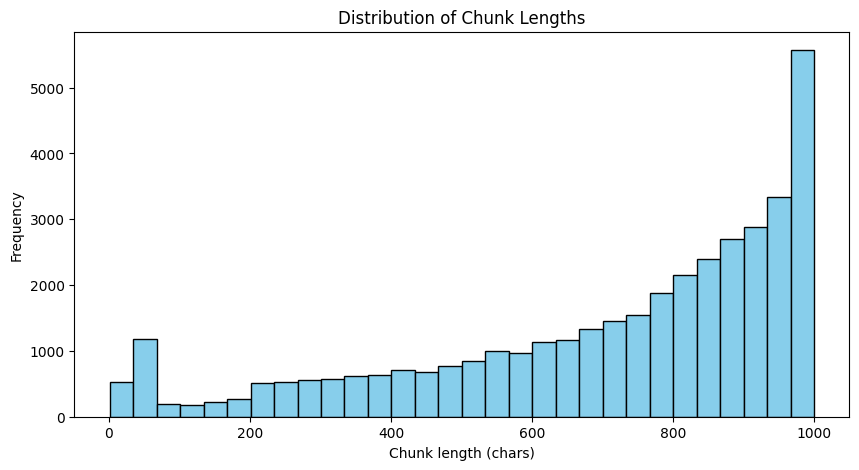

In [ ]:
#chunk distribution import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist([c['num_chars'] for chunk_file in os.listdir(CHUNKS_FOLDER)
          for c in json.load(open(os.path.join(CHUNKS_FOLDER, chunk_file)))],
         bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Chunk length (chars)")
plt.ylabel("Frequency")
plt.title("Distribution of Chunk Lengths")
plt.show()


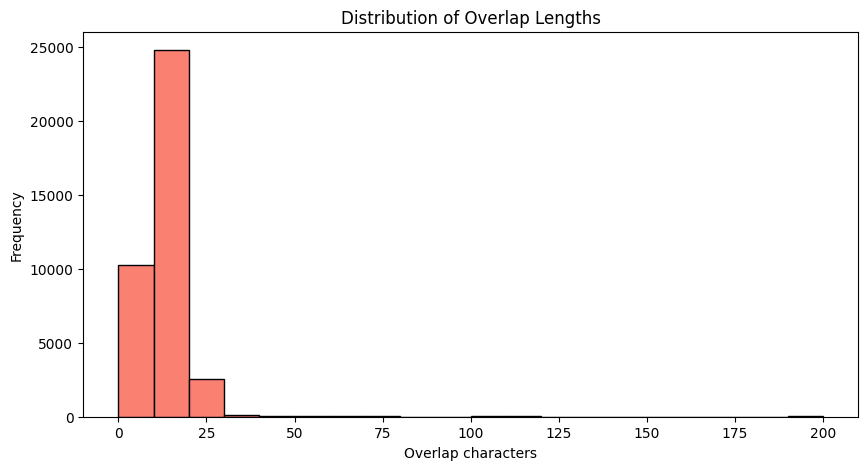

Overlap stats:
Min: 0, Max: 200, Mean: 12.84


In [ ]:
#chunk overlap
plt.figure(figsize=(10,5))
plt.hist(overlap_lengths, bins=20, color='salmon', edgecolor='black')
plt.xlabel("Overlap characters")
plt.ylabel("Frequency")
plt.title("Distribution of Overlap Lengths")
plt.show()

# Quick stats
print("Overlap stats:")
print(f"Min: {min(overlap_lengths)}, Max: {max(overlap_lengths)}, Mean: {sum(overlap_lengths)/len(overlap_lengths):.2f}")


In [ ]:
import json
import os

# Pick one chunk file
sample_file = os.path.join(CHUNKS_FOLDER, os.listdir(CHUNKS_FOLDER)[0])

with open(sample_file, "r", encoding="utf-8") as f:
    chunks = json.load(f)

# Pick a consecutive chunk pair to inspect
i = 1  # check overlap between chunk 0 and chunk 1
prev_chunk_text = chunks[i-1]['text']
curr_chunk_text = chunks[i]['text']

# Last 50 chars of previous chunk
print("Last 50 chars of previous chunk:")
print(prev_chunk_text[-50:])

# First 50 chars of current chunk
print("\nFirst 50 chars of current chunk:")
print(curr_chunk_text[:50])

# Optional: check larger overlap context (200 chars)
print("\nLast 200 chars of previous chunk:")
print(prev_chunk_text[-200:])
print("\nFirst 200 chars of current chunk:")
print(curr_chunk_text[:200])


Last 50 chars of previous chunk:
scrow is referred to herein as "i-escrow content."

First 50 chars of current chunk:
(b) "co-branded site" means the web-site accessibl

Last 200 chars of previous chunk:
, photographs, video, graphics, data or software. content provided by 2themart is referred to herein as "2themart content" and content provided by i-escrow is referred to herein as "i-escrow content."

First 200 chars of current chunk:
(b) "co-branded site" means the web-site accessible through domain name, for the services implemented by i-escrow. the homepage of this web-site will visibly display both 2themart marks and i-escrow m


In [ ]:
print(prev_chunk_text[-200:])
print(curr_chunk_text[:200])


, photographs, video, graphics, data or software. content provided by 2themart is referred to herein as "2themart content" and content provided by i-escrow is referred to herein as "i-escrow content."
(b) "co-branded site" means the web-site accessible through domain name, for the services implemented by i-escrow. the homepage of this web-site will visibly display both 2themart marks and i-escrow m


Chunk Embeddings & Vector Normalization

In [ ]:
pip install "langsmith>=0.3.45,<1.0.0"


In [ ]:
import langchain
import langsmith
print(langchain.__version__, langsmith.__version__)


1.1.3 0.4.59


In [ ]:
!pip install --force-reinstall langchain langchain-community faiss-cpu sentence-transformers

  Using cached langchain-1.1.3-py3-none-any.whl.metadata (4.9 kB)
  Using cached langchain_community-0.4.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached faiss_cpu-1.13.1-cp310-abi3-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (7.6 kB)
  Using cached sentence_transformers-5.2.0-py3-none-any.whl.metadata (16 kB)
  Using cached langchain_core-1.2.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pydantic-2.12.5-py3-none-any.whl.metadata (90 kB)
  Using cached langchain_classic-1.0.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached langsmith-0.4.59-py3-none-any.whl.metadata (15 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

print("✅ Imports successful")


✅ Imports successful


In [ ]:
import os
import json
from tqdm import tqdm

from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

# =========================
# Paths
# =========================
CHUNKS_FOLDER = "/content/drive/MyDrive/CLAUSE_AI/dataset/chunks"
FAISS_INDEX_PATH = "/content/drive/MyDrive/CLAUSE_AI/faiss_local_index"

# =========================
# Embedding Model
# =========================
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

# =========================
# Load All Chunks
# =========================
texts = []
metadatas = []

chunk_files = sorted(os.listdir(CHUNKS_FOLDER))

for chunk_file in tqdm(chunk_files, desc="Loading chunks"):
    with open(os.path.join(CHUNKS_FOLDER, chunk_file), "r") as f:
        chunks = json.load(f)

        for idx, c in enumerate(chunks):
            texts.append(c["text"])
            metadatas.append({
                "source_file": chunk_file,
                "chunk_id": c.get("chunk_id", idx)
            })

print(f"\n✅ Total chunks loaded: {len(texts)}")

# =========================
# Build FAISS Index
# =========================
print("🚀 Creating FAISS vector store (this may take time)...")

vector_store = FAISS.from_texts(
    texts=texts,
    embedding=embeddings,
    metadatas=metadatas
)

# =========================
# Save FAISS Index
# =========================
vector_store.save_local(FAISS_INDEX_PATH)

print(f"\n🎉 FAISS index saved at: {FAISS_INDEX_PATH}")
#Earlier snippets → create embeddings & build the FAISS index.



Loading chunks: 100%|██████████| 510/510 [00:16<00:00, 31.23it/s]



✅ Total chunks loaded: 38535
🚀 Creating FAISS vector store (this may take time)...

🎉 FAISS index saved at: /content/drive/MyDrive/CLAUSE_AI/faiss_local_index


Embedding vector norms (first 10): [0.99999994 1.         1.0000001  1.         1.         1.
 1.         1.         1.         0.99999994]
Min norm: 0.9999998 Max norm: 1.0000001 Mean norm: 1.0


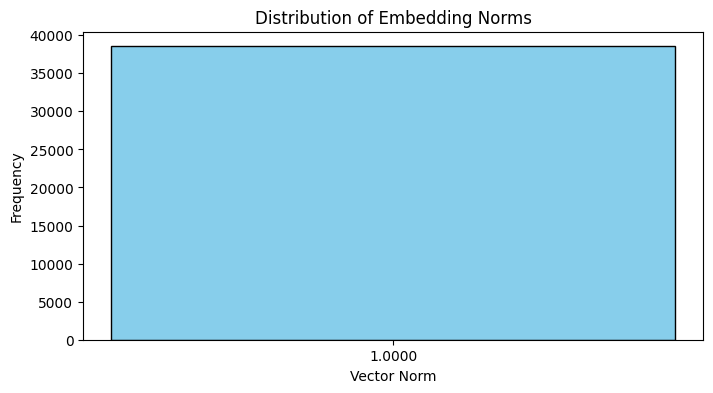

Cosine similarity between chunk 0 and 1: 0.6269
Dot product between chunk 0 and 1: 0.6269


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

# =========================
# Load embeddings + FAISS
# =========================
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

vector_store = FAISS.load_local(
    "/content/drive/MyDrive/CLAUSE_AI/faiss_local_index",
    embeddings,
    allow_dangerous_deserialization=True
)

# Reconstruct embeddings matrix from FAISS
embeddings_matrix = np.array([vector_store.index.reconstruct(i) for i in range(vector_store.index.ntotal)])

# =========================
# Step 1: Vector Length Check
# =========================
norms = np.linalg.norm(embeddings_matrix, axis=1)
print("Embedding vector norms (first 10):", norms[:10])
print("Min norm:", norms.min(), "Max norm:", norms.max(), "Mean norm:", norms.mean())

# =========================
# Step 2: Visualize Embedding Norm Distribution safely
# =========================
plt.figure(figsize=(8,4))
if np.allclose(norms.min(), norms.max()):
    # All norms almost same → plot a single bar
    plt.bar([0], [len(norms)], color='skyblue', edgecolor='black')
    plt.xticks([0], [f"{norms[0]:.4f}"])
else:
    # Normal histogram
    plt.hist(norms, bins='auto', color='skyblue', edgecolor='black')

plt.title("Distribution of Embedding Norms")
plt.xlabel("Vector Norm")
plt.ylabel("Frequency")
plt.show()

# =========================
# Step 3: Sanity Check - Similarity
# =========================
vec1 = embeddings_matrix[0].reshape(1, -1)
vec2 = embeddings_matrix[1].reshape(1, -1)

cos_sim = cosine_similarity(vec1, vec2)[0][0]
dot_prod = np.dot(vec1, vec2.T)[0][0]

print(f"Cosine similarity between chunk 0 and 1: {cos_sim:.4f}")
print(f"Dot product between chunk 0 and 1: {dot_prod:.4f}")


Embeddings matrix shape: (38535, 384)
Embedding vector norms (first 10): [0.99999994 1.         1.0000001  1.         1.         1.
 1.         1.         1.         0.99999994]
Min norm: 0.9999998 Max norm: 1.0000001 Mean norm: 1.0


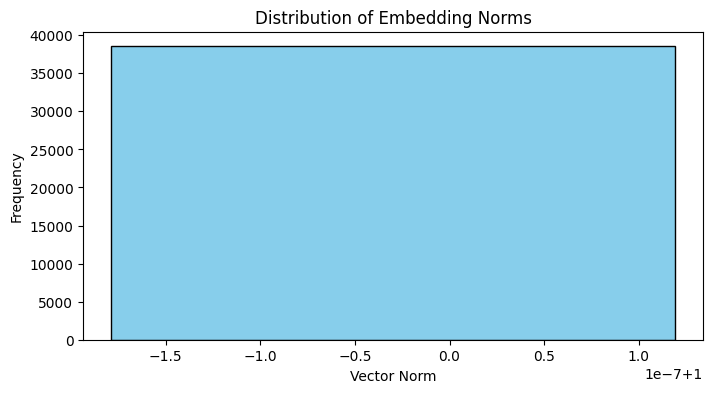

Cosine similarity between chunk 0 and 1: 0.6269
Dot product between chunk 0 and 1: 0.6269


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

# =========================
# Load FAISS vector store
# =========================
FAISS_INDEX_PATH = "/content/drive/MyDrive/CLAUSE_AI/faiss_local_index"

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

vector_store = FAISS.load_local(
    FAISS_INDEX_PATH,
    embeddings,
    allow_dangerous_deserialization=True
)

# =========================
# Step 0: Build embeddings matrix
# =========================
embeddings_matrix = np.array([vector_store.index.reconstruct(i) for i in range(vector_store.index.ntotal)])
print(f"Embeddings matrix shape: {embeddings_matrix.shape}")

# =========================
# Step 1: Vector Length Check
# =========================
norms = np.linalg.norm(embeddings_matrix, axis=1)
print("Embedding vector norms (first 10):", norms[:10])
print("Min norm:", norms.min(), "Max norm:", norms.max(), "Mean norm:", norms.mean())

# =========================
# Step 2: Visualize Embedding Norm Distribution (robust)
# =========================
plt.figure(figsize=(8,4))

if np.isclose(norms.min(), norms.max()):
    # All norms almost equal, plot single bin
    plt.hist(norms, bins=1, color='skyblue', edgecolor='black')
else:
    # Use automatic binning
    plt.hist(norms, bins='auto', color='skyblue', edgecolor='black')

plt.title("Distribution of Embedding Norms")
plt.xlabel("Vector Norm")
plt.ylabel("Frequency")
plt.show()

# =========================
# Step 3: Sanity Check - Similarity
# =========================
# Pick first two chunks as example
vec1 = embeddings_matrix[0].reshape(1, -1)
vec2 = embeddings_matrix[1].reshape(1, -1)

cos_sim = cosine_similarity(vec1, vec2)[0][0]
dot_prod = np.dot(vec1, vec2.T)[0][0]

print(f"Cosine similarity between chunk 0 and 1: {cos_sim:.4f}")
print(f"Dot product between chunk 0 and 1: {dot_prod:.4f}")


In [ ]:
# =========================
# Step 4: Preview One Embedding File / Preview embeddings
# =========================

# Print shape of embeddings matrix
print("Embeddings matrix shape:", embeddings_matrix.shape)

# Preview first 3 embeddings (each is a vector)
for i in range(3):
    print(f"\nEmbedding for chunk {i} (horizontal view):")
    print(embeddings_matrix[i])  # horizontal

    print(f"\nEmbedding for chunk {i} (vertical view):")
    print(embeddings_matrix[i].reshape(-1,1))  # vertical


Embeddings matrix shape: (38535, 384)

Embedding for chunk 0 (horizontal view):
[ 2.34150067e-02 -3.92378308e-02 -3.00737135e-02 -8.70625600e-02
  2.56342366e-02  9.26479511e-03 -4.82040411e-03  2.55055577e-02
  6.04733750e-02 -7.27311224e-02  5.46864085e-02  3.08255255e-02
  9.03791040e-02 -4.41836044e-02  7.67318234e-02 -3.83301079e-02
  1.78300753e-01 -6.03594966e-02  1.53697561e-02 -3.01782545e-02
  2.81448103e-02  2.64832377e-02 -2.35990826e-02  1.16801616e-02
 -9.11811832e-03  4.31992188e-02 -8.63908455e-02  6.03479780e-02
  4.05022725e-02 -1.00433141e-01  9.03877690e-02  1.33926068e-02
  6.10536747e-02  7.48731708e-03  2.57127881e-02  2.99604386e-02
 -1.34807611e-02 -1.04643367e-01 -2.56364141e-02 -3.12878005e-03
  4.45608981e-03 -1.60150714e-02 -7.48707950e-02  4.10232060e-02
 -1.82916112e-02  1.89803690e-02 -3.32588255e-02  5.85569441e-02
 -6.36179000e-02  9.55384001e-02  2.77360417e-02  4.13493393e-03
 -4.92752604e-02  3.36493962e-02  3.18401540e-03  4.62413719e-03
 -3.113046

In [ ]:
#This snippet → uses that saved index to search & fetch relevant text.
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

vector_store = FAISS.load_local(
    "/content/drive/MyDrive/CLAUSE_AI/faiss_local_index",
    embeddings,
    allow_dangerous_deserialization=True
)

results = vector_store.similarity_search(
    "termination clause with notice period",
    k=5
)

for i, doc in enumerate(results, 1):
    print(f"\n--- Result {i} ---")
    print(doc.page_content[:500])
    print(doc.metadata)



--- Result 1 ---
11.2 the company reserves the right in its sole and absolute discretion to give written notice to
terminate your employment forthwith and to make a payment to you in lieu of salary and the benefits set out in paragraph 5 of this agreement for all or any unexpired part of the notice period. for the avoidance of doubt, any payment in lieu made pursuant to this paragraph 11.2 will not include any element in relation to any payment in respect of (i) any annual performance bonus or (ii) any holiday e
{'source_file': 'BICYCLETHERAPEUTICSPLC_03_10_2020-EX-10.11-SERVICE AGREEMENT_chunks.json', 'chunk_id': 25}

--- Result 2 ---
15. termination of employment 15.1 the appointment may be terminated by either party giving the other at least 12 months' notice in writing. 15.2 the company may in its sole and absolute discretion (whether or not any notice of termination has been given under sub clause 15.1) terminate this agreement at any time and with immediate effect by giving noti

In [ ]:
!pip install -U langchain langchain-openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y langchain


Found existing installation: langchain 1.1.3
Uninstalling langchain-1.1.3:
  Successfully uninstalled langchain-1.1.3


In [ ]:
!pip install --upgrade langchain langchain-openai


  Using cached langchain-1.1.3-py3-none-any.whl.metadata (4.9 kB)
Using cached langchain-1.1.3-py3-none-any.whl (102 kB)


In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

# Load embeddings
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

# Load FAISS index
vector_store = FAISS.load_local(
    "/content/drive/MyDrive/CLAUSE_AI/faiss_local_index",
    embeddings,
    allow_dangerous_deserialization=True
)

# Retrieve top 5 chunks
results = vector_store.similarity_search(
    "termination clause with notice period",
    k=5
)

for i, doc in enumerate(results, 1):
    print(f"\n--- Result {i} ---")
    print(doc.page_content[:500])
    print(doc.metadata)



--- Result 1 ---
11.2 the company reserves the right in its sole and absolute discretion to give written notice to
terminate your employment forthwith and to make a payment to you in lieu of salary and the benefits set out in paragraph 5 of this agreement for all or any unexpired part of the notice period. for the avoidance of doubt, any payment in lieu made pursuant to this paragraph 11.2 will not include any element in relation to any payment in respect of (i) any annual performance bonus or (ii) any holiday e
{'source_file': 'BICYCLETHERAPEUTICSPLC_03_10_2020-EX-10.11-SERVICE AGREEMENT_chunks.json', 'chunk_id': 25}

--- Result 2 ---
15. termination of employment 15.1 the appointment may be terminated by either party giving the other at least 12 months' notice in writing. 15.2 the company may in its sole and absolute discretion (whether or not any notice of termination has been given under sub clause 15.1) terminate this agreement at any time and with immediate effect by giving noti